<center><h1>Yu-Chieh Chen</h3></center>
<center><h4>GitHub Username: ychen221</h4></center>
<center><h4>USCID: 6391765959</h4></center>
<br>

## 1. Text Classification

### (a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.

### (b) Data Exploration and Pre-processing

#### i.You can use binary encoding for the sentiments , i.e y = 1 for positive senti- ments and y = − 1 for negative sentiments. 
#### ii. The data are pretty clean. Remove the punctuation and numbers from the data. 
#### iii. The name of each text file starts with cv number . Use text files 0-699 in each class for training and 700-999 for testing. 
#### iv. Count the number of unique words in the whole dataset (train + test) and print it out. 
#### v. Calculate the average review length and the standard deviation of review lengths. Report the results. vi. Plot the histogram of review lengths

In [1]:
import os
import numpy as np
import re


def load_data(folder):
    """ Load data from files and preprocess it. """
    train_texts, test_texts, train_labels, test_labels = [], [], [], []
    files = os.listdir(folder)

    
    regex = re.compile(r'^cv\d{3}_\d+\.txt$')  # Regex to match filenames like 'cv000_29590.txt'
    files = [f for f in files if regex.match(f)]

    # Sort files based on the numerical part of the filename
    files.sort(key=lambda x: int(x.split('_')[0][2:]))

    for file in files:
        file_path = os.path.join(folder, file)
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read().lower()
            text = re.sub(r'[\d]', '', text)  # Remove numbers
            text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

            # Extract CV number from filename considering the new pattern
            cv_number = int(file.split("_")[0][2:])  # Extract number after 'cv' and before '_'
            if 0 <= cv_number <= 699:
                train_labels.append(1 if 'pos' in folder else -1)
                train_texts.append(text)
            elif 700 <= cv_number <= 999:
                test_labels.append(1 if 'pos' in folder else -1)  # Assign a placeholder label for test data
                test_texts.append(text)
    return train_texts, test_texts, train_labels, test_labels

train_pos_texts, test_pos_texts, train_pos_labels, test_pos_labels = load_data('../data/pos')
train_neg_texts, test_neg_texts, train_neg_labels, test_neg_labels = load_data('../data/neg')

# Combine and separate training and testing data
train_texts = np.array(train_pos_texts + train_neg_texts)
test_texts = np.array(test_pos_texts + test_neg_texts)
train_labels = np.array(train_pos_labels + train_neg_labels)
test_labels = np.array(test_pos_labels + test_neg_labels)

# Combine all texts
all_texts = np.concatenate([train_texts, test_texts])

# find unique words
unique_words = set()
for text in all_texts:
    words = text.split()
    unique_words.update(words)

# Print the number of unique words
print(f"Number of unique words in the dataset: {len(unique_words)}")

# Calculate the length of each review
review_lengths = [len(text.split()) for text in all_texts]

# Calculate the average length and standard deviation
average_length = np.mean(review_lengths)
std_dev_length = np.std(review_lengths)

# Report the results
print(f"Average review length: {average_length:.2f} words")
print(f"Standard deviation of review lengths: {std_dev_length:.2f} words")

Number of unique words in the dataset: 47037
Average review length: 644.36 words
Standard deviation of review lengths: 284.98 words


#### vi.Plot the histogram of review lengths.

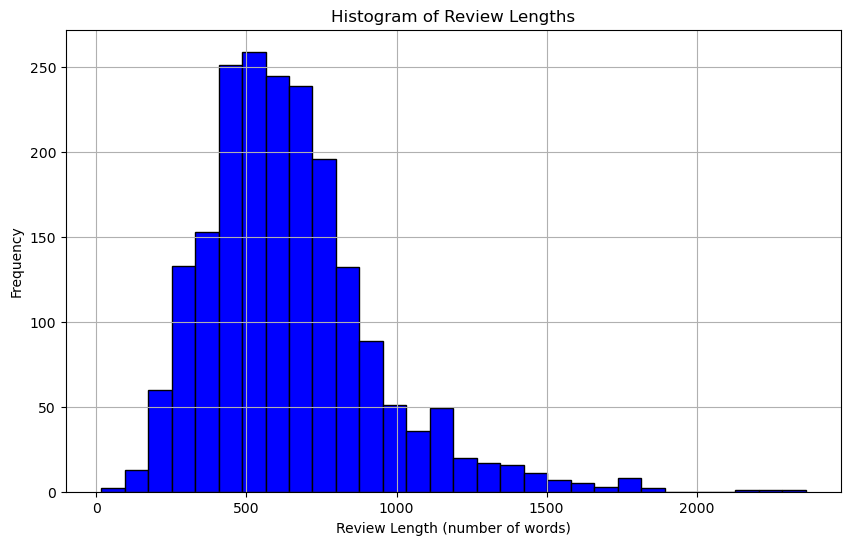

In [2]:
import matplotlib.pyplot as plt


# Plotting the histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length (number of words)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.

I tried to code it without using the Kera first
#### Method 1:

In [3]:
from collections import Counter


# Step 1: Create a frequency dictionary
word_counts = Counter(word for text in all_texts for word in text.split())
# Step 2: Sort words by frequency (most common first)
sorted_words = sorted(word_counts, key=word_counts.get, reverse=True)

# Step 3: Create a dictionary to map words to their ranks
word_ranks = {word: rank for rank, word in enumerate(sorted_words, start=1)}

# Step 4: Tokenize each text document using the word ranks
tokenized_texts = [[word_ranks[word] for word in text.split()] for text in train_texts]

# Example of how the tokenized data looks for the first document
print(f"Original Text: {train_texts[0]}")
print(f"Tokenized Text: {tokenized_texts[0]}")


Original Text: films adapted from comic books have had plenty of success  whether theyre about superheroes  batman  superman  spawn   or geared toward kids  casper  or the arthouse crowd  ghost world   but theres never really been a comic book like from hell before  
for starters  it was created by alan moore  and eddie campbell   who brought the medium to a whole new level in the mid s with a part series called the watchmen  
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd  
the book  or  graphic novel   if you will  is over  pages long and includes nearly  more that consist of nothing but footnotes  
in other words  dont dismiss this film because of its source  
if you can get past the whole comic book thing  you might find another stumbling block in from hells directors  albert and allen hughes  
getting the hughes brothers to direct this seems almost as ludicrous as casting carrot t

#### Method 2:

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create the tokenizer
tokenizer = Tokenizer()  # By default, it sorts words by frequency

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(all_texts)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(all_texts)

print(sequences[0])


[67, 2745, 29, 355, 1634, 32, 90, 1047, 4, 627, 628, 321, 40, 7660, 704, 4783, 1755, 47, 7257, 1328, 396, 4949, 47, 1, 10837, 1777, 1778, 148, 16, 140, 108, 89, 68, 2, 355, 405, 39, 29, 503, 142, 12, 9974, 9, 31, 853, 21, 1352, 1802, 3, 944, 1512, 28, 879, 1, 3951, 5, 2, 282, 113, 540, 7, 1, 7258, 126, 11, 2, 202, 262, 381, 1, 27315, 5, 180, 1802, 3, 1512, 1882, 27316, 1, 845, 4, 495, 1, 13221, 69, 22, 39, 820, 325, 1231, 6, 2142, 5, 175, 2, 94, 1232, 1, 405, 47, 1549, 523, 51, 35, 65, 6, 111, 4950, 196, 3, 1233, 440, 42, 8, 9266, 4, 181, 16, 20915, 7, 73, 637, 119, 6914, 14, 15, 84, 4, 23, 2110, 51, 35, 64, 74, 403, 1, 282, 355, 405, 179, 35, 228, 188, 124, 6595, 2808, 7, 29, 11930, 880, 2858, 3, 1029, 2592, 333, 1, 2592, 620, 5, 1967, 14, 136, 178, 10, 2970, 10, 1089, 8121, 466, 7, 83, 232, 16, 27317, 103, 14, 28, 153, 5, 1967, 2, 15, 185, 260, 7, 1, 4628, 3, 629, 89, 996, 1036, 690, 58, 1, 1609, 7661, 384, 1261, 1009, 911, 1, 4628, 7, 486, 6, 4, 218, 20916, 7, 14973, 3316, 133, 23, 

#### viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [5]:
import numpy as np

# Assuming review_lengths is already defined from previous steps
review_lengths = np.array([len(text.split()) for text in all_texts])

# Calculate the 70th percentile
L_70 = np.percentile(review_lengths, 70)
print(f"The 70th percentile of review lengths: {L_70:.0f} words")

# Calculate the 90th percentile if feeling adventurous
L_90 = np.percentile(review_lengths, 90)
print(f"The 90th percentile of review lengths: {L_90:.0f} words")


The 70th percentile of review lengths: 737 words
The 90th percentile of review lengths: 993 words


#### ix.Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L

In [6]:
import numpy as np


# Function to truncate or pad reviews
def truncate_or_pad(texts, max_length):
    processed_texts = []
    for text in texts:
        words = text.split()
        if len(words) > max_length:
            # Truncate the review
            processed_text = words[:max_length]
        else:
            # Pad the review with '0' (you can choose any other padding token)
            processed_text = words + ['0'] * (max_length - len(words))
        
        processed_texts.append(processed_text)
    
    return processed_texts

# Apply the function to train_texts
processed_texts = truncate_or_pad(train_texts, 737)

# Convert processed texts back to strings if necessary
processed_texts = [' '.join(text) for text in processed_texts]

# Optionally convert to a numpy array
processed_texts_array = np.array(processed_texts)

# Show the first few processed texts
print(processed_texts_array[0])


films adapted from comic books have had plenty of success whether theyre about superheroes batman superman spawn or geared toward kids casper or the arthouse crowd ghost world but theres never really been a comic book like from hell before for starters it was created by alan moore and eddie campbell who brought the medium to a whole new level in the mid s with a part series called the watchmen to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd the book or graphic novel if you will is over pages long and includes nearly more that consist of nothing but footnotes in other words dont dismiss this film because of its source if you can get past the whole comic book thing you might find another stumbling block in from hells directors albert and allen hughes getting the hughes brothers to direct this seems almost as ludicrous as casting carrot top in well anything but riddle me this who better to

### c) Word Embeddings
#### i. One can use tokenized text as inputs to a deep neural network. However, a re- cent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings . “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.” 4 . Most deep learning modules (including Keras) provide a convenient way to convert positive integer rep- resentations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are inter- ested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.(This is done by setting an argument in the embedding layer provided by Keras. Example: model.add(Embedding(top_words, 32, input_length=max_words)), where top_words=5,000 and max_words=L) 5 If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix. ii. Flatten the matrix of each document to a vector.


When you use a 32-dimensional vector to represent each word in your corpus, as is typical with word embeddings, each dimension of the vector encodes some aspect of the word's semantic and syntactic properties. However, the meanings of individual dimensions in such vectors are not typically interpretable in isolation. The embeddings are learned in such a way that the vector as a whole represents the word's usage in language, based on how it appears with other words across a large text corpus.

In [7]:
import numpy as np


# Convert -1 to 0
train_labels[train_labels == -1] = 0

# check the updated unique values and their counts
unique, counts = np.unique(train_labels, return_counts=True)
print("Updated labels and counts:", dict(zip(unique, counts)))


Updated labels and counts: {0: 700, 1: 700}


In [8]:
train_labels.shape

(1400,)

In [9]:
test_labels.shape

(600,)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 5000  # Only the top 5000 words will be considered
max_length = 737   # This will be the length each input sequence is padded to

tokenizer = Tokenizer(num_words=vocab_size)  # Initializes tokenizer
tokenizer.fit_on_texts(processed_texts) 

sequences = tokenizer.texts_to_sequences(processed_texts)  # Converts texts to sequences of integers
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')  # Ensures uniform input length


In [11]:
padded_sequences

array([[  69, 3384,   30, ...,    0,    0,    0],
       [ 151,  136,    4, ...,    0,    0,    0],
       [ 707,  284, 3829, ...,    0,    0,    0],
       ...,
       [ 682,  589, 4236, ...,    0,    0,    0],
       [  83, 1719,    3, ...,    0,    0,    0],
       [1159,   19,   51, ...,    0,    0,    0]], dtype=int32)

### (d) Multi-Layer Perceptron
#### i.Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout


# Assuming the input parameters are set
vocab_size = 5000  # Top 5000 words
embedding_dim = 32  # Each word will be represented by a 32-dimensional vector
max_length = 737    # Maximum length of the sequences

# Initialize the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, input_length=max_length, trainable=True),
    
    # Flatten the embeddings output to feed into a dense layer
    Flatten(),
    
    # First hidden layer with dropout at 20%
    Dense(50, activation='relu'),
    Dropout(0.2),
    
    # Second hidden layer with dropout at 50%
    Dense(50, activation='relu'),
    Dropout(0.5),
    
    # Third hidden layer with dropout at 50%
    Dense(50, activation='relu'),
    Dropout(0.5),
    
    # Output layer with a single sigmoid unit for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model on the training data
history = model.fit(padded_sequences, train_labels, epochs=2, batch_size=10)



Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4832 - loss: 0.7049
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5486 - loss: 0.6803


In [23]:
padded_sequences.shape

(1400, 737)

In [24]:
# process the text data

processed_texts_test = truncate_or_pad(test_texts, 737)
# Convert processed texts back to strings if necessary
processed_texts_test = [' '.join(text) for text in processed_texts_test]

vocab_size = 5000  # Only the top 5000 words will be considered
max_length = 737   

tokenizer_t = Tokenizer(num_words=vocab_size)  # Initializes tokenizer
tokenizer_t.fit_on_texts(processed_texts_test)  

sequences_t = tokenizer_t.texts_to_sequences(processed_texts_test) 
padded_sequences_test = pad_sequences(sequences_t, maxlen=max_length, padding='post', truncating='post')  # Ensures uniform input length



# Convert -1 to 0
test_labels[test_labels == -1] = 0


train_loss, train_accuracy = model.evaluate(padded_sequences, train_labels)
test_loss, test_accuracy = model.evaluate(padded_sequences_test, test_labels)



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8183 - loss: 0.5829 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8001 - loss: 0.6119


### (e) One-Dimensional Convolutional Neural Network : Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively
#### i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [30]:
vocab_size = 5001  # Top 5000 words plus padding index
embedding_dim = 32
max_length = 737

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),  # 32 feature maps and kernel size of 3
    MaxPooling1D(pool_size=2), 
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(
    padded_sequences,  
    train_labels, 
    epochs=2,
    batch_size=10,

)


Epoch 1/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4877 - loss: 0.7034
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5201 - loss: 0.6915


In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# process the text data
processed_texts_test = truncate_or_pad(test_texts, 737)
# Convert processed texts back to strings if necessary
processed_texts_test = [' '.join(text) for text in processed_texts_test]

vocab_size = 5000  # Only the top 5000 words will be considered
max_length = 737   

tokenizer_t = Tokenizer(num_words=vocab_size)  
tokenizer_t.fit_on_texts(processed_texts_test)
sequences_t = tokenizer_t.texts_to_sequences(processed_texts_test) 
padded_sequences_test = pad_sequences(sequences_t, maxlen=max_length, padding='post', truncating='post')  # Ensures uniform input length



# Convert -1 to 0
test_labels[test_labels == -1] = 0


train_loss, train_accuracy = model.evaluate(padded_sequences, train_labels)
test_loss, test_accuracy = model.evaluate(padded_sequences_test, test_labels)




44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5987 - loss: 0.6828
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5243 - loss: 0.6958


### (f) Long Short-Term Memory Recurrent Neural Network
#### i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding

vocab_size = 5001 # example value, adjust as per your dataset
max_sequence_length = 737  # example value, adjust as necessary

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32, input_length=max_sequence_length),
    LSTM(32, dropout=0.2, recurrent_dropout=0.2),  # LSTM layer with dropout
    Dense(256, activation='relu'),  # Dense layer with 256 ReLU units
    Dropout(0.2),  # Dropout layer after dense layer
    Dense(1, activation='sigmoid') 
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    padded_sequences,  
    train_labels,           
    epochs=10,        
    batch_size=10,   
)


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.4803 - loss: 0.6941
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.4904 - loss: 0.6942
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4925 - loss: 0.6938
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4923 - loss: 0.6937
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.5090 - loss: 0.6933
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5047 - loss: 0.6934
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4856 - loss: 0.6940
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.4998 - loss: 0.6931
Epoch 9/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.4783 - loss: 0.6932
Epoch 10/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.4880 - loss: 0.6935


In [20]:
model.evaluate(padded_sequences, train_labels)
model.evaluate(padded_sequences_test, test_labels)



44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8316 - loss: 0.6915
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8132 - loss: 0.6916


[0.6930835247039795, 0.5016666650772095]

#### Reference
1. tf.keras.preprocessing.text.Tokenizer:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
2. Embedding layer: https://keras.io/api/layers/core_layers/embedding/
3. Multi-Layer Perceptron Learning in Tensorflow: https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/
4. GhatGPT